In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

In [117]:
df = pd.read_csv('Admission_Predict.csv')

In [118]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [119]:
print(df.duplicated().sum())

0


In [120]:
df.drop_duplicates()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [121]:
df = df.rename({'Serial No.' : 'sNo.', 'GRE Score 	': 'GRE_score', 'TOEFL Score': 'TOEFL_score', 'University Rating': 'university_rating',
                'Chance of Admit ': 'chance_of_admission'}, axis =1)

In [122]:
df.head()

,sNo.,GRE Score,TOEFL_score,university_rating,SOP,LOR,CGPA,Research,chance_of_admission
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [123]:
print(df.isnull().sum())

sNo.                   0
GRE Score              0
TOEFL_score            0
university_rating      0
SOP                    0
LOR                    0
CGPA                   0
Research               0
chance_of_admission    0
dtype: int64


In [124]:
df = df.drop('sNo.', axis = 1)

In [125]:
df.shape

(400, 8)

<Axes: >

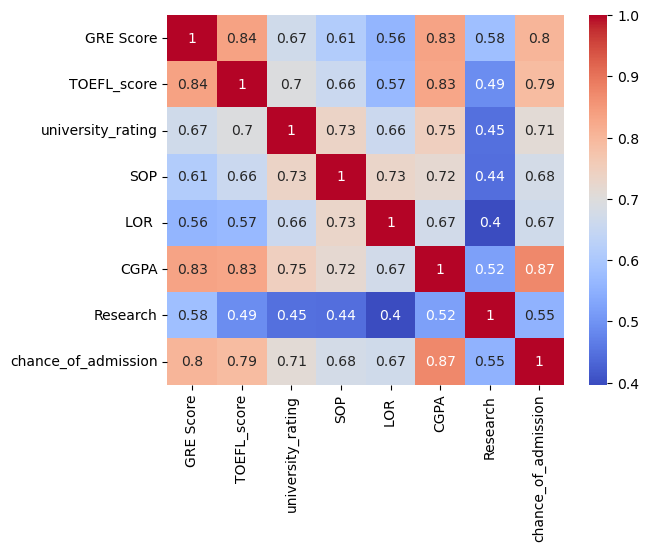

In [137]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True, cmap="coolwarm")

In [127]:
X = df.drop('chance_of_admission', axis = 1)

In [128]:
X.shape

(400, 7)

In [129]:
y = df['chance_of_admission'].apply(lambda x: 1 if x>=.5 else 0)
y

0      1
1      1
2      1
3      1
4      1
      ..
395    1
396    1
397    1
398    1
399    1
Name: chance_of_admission, Length: 400, dtype: int64

(array([ 33.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 367.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

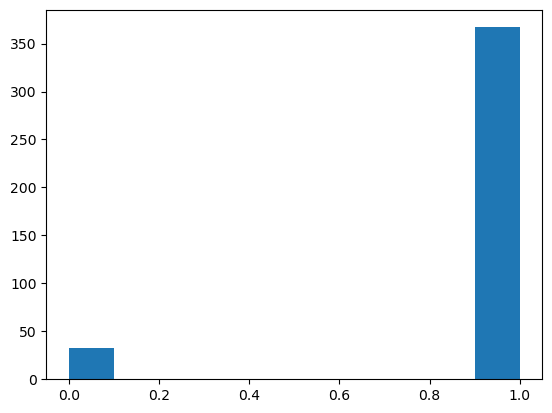

In [130]:
plt.hist(y)

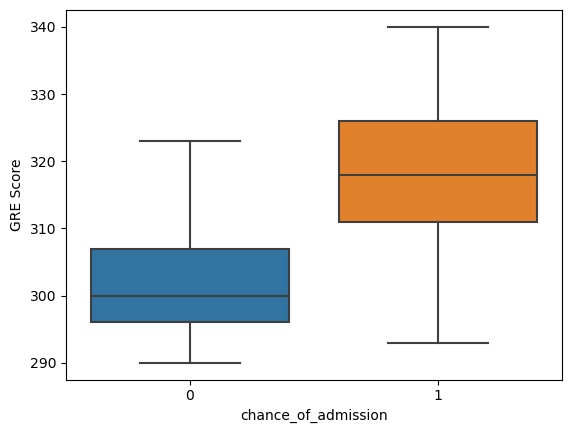

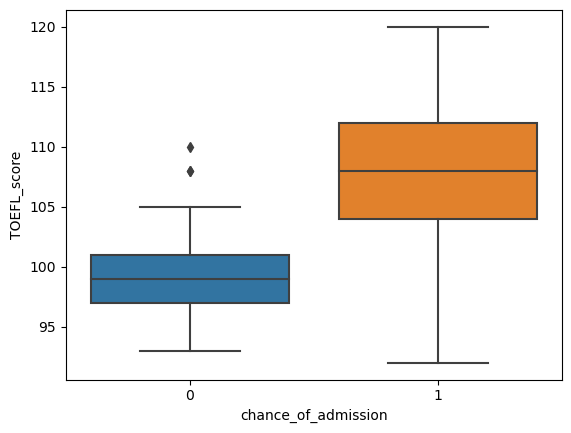

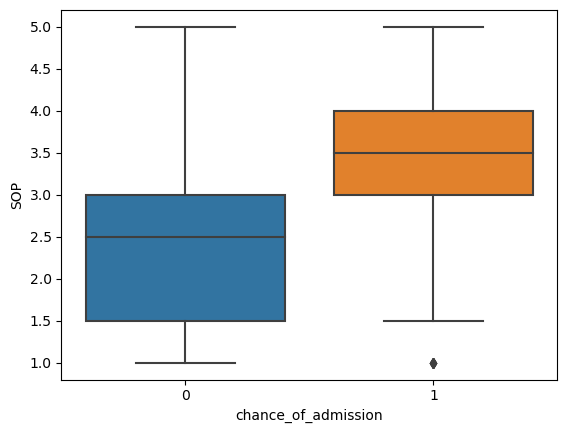

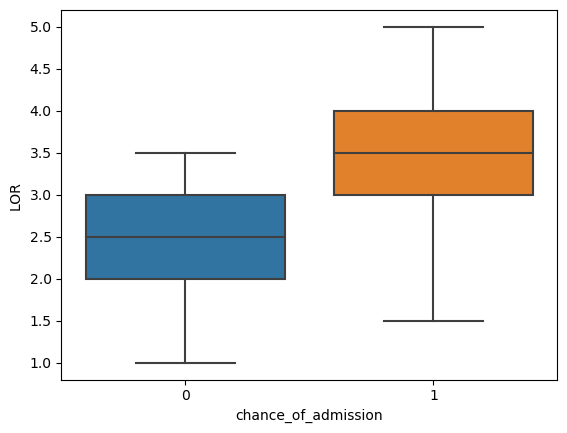

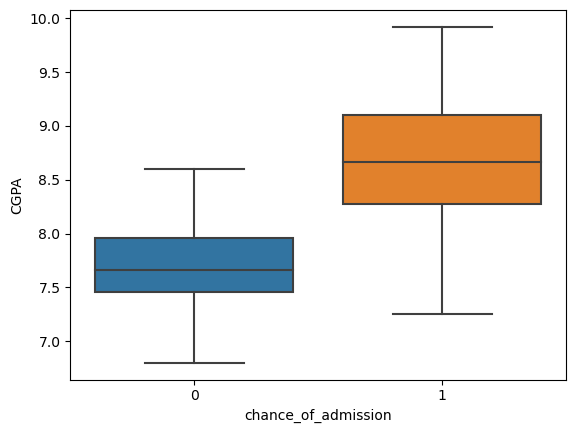

In [135]:
for var in df[['GRE Score', 'TOEFL_score', 'SOP', 'LOR ', 'CGPA']]:
    sns.boxplot(x = y, y = var, data = df)
    plt.show()

<Axes: xlabel='university_rating', ylabel='count'>

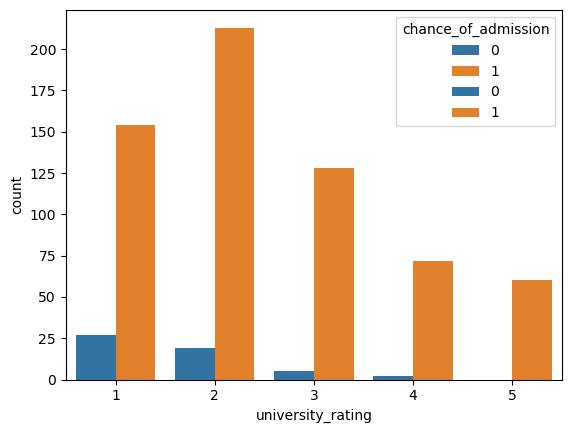

In [136]:
#exploring categorical_variable
sns.countplot(x = df['Research'], hue = y, data = df)
sns.countplot(x = df['university_rating'], hue = y, data = df)

In [138]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [140]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

LogisticRegression()

In [147]:
y_pred = regressor.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [143]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         5
           1       1.00      0.93      0.97        75

    accuracy                           0.94        80
   macro avg       0.75      0.97      0.82        80
weighted avg       0.97      0.94      0.95        80

[[ 5  0]
 [ 5 70]]
